In [2]:
## define helper function, set up API
##https://www.tng-project.org/data/docs/api/
import requests

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"f3c97208f4981e63b57bb02c7135912b"}

def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    return r

In [3]:
## Issue request to API root
r = get(baseUrl)

In [4]:
## dictionary w/ one key simulations
r.keys()

dict_keys(['simulations'])

In [5]:
## 64 available simulations
len(r['simulations'])

65

In [6]:
## print fields of the first sim
r['simulations'][0]

{'name': 'Illustris-1',
 'num_snapshots': 134,
 'url': 'http://www.tng-project.org/api/Illustris-1/'}

In [7]:
## print names of the rest of the sims
names = [sim['name'] for sim in r['simulations']]
names

['Illustris-1',
 'Illustris-1-Dark',
 'Illustris-2',
 'Illustris-2-Dark',
 'Illustris-3',
 'Illustris-3-Dark',
 'TNG100-1',
 'TNG100-1-Dark',
 'TNG100-2',
 'TNG100-2-Dark',
 'TNG100-3',
 'TNG100-3-Dark',
 'TNG300-3',
 'TNG300-2-Dark',
 'TNG300-2',
 'TNG300-1-Dark',
 'TNG300-1',
 'TNG300-3-Dark',
 'TNG50-1',
 'TNG50-1-Dark',
 'TNG50-2',
 'TNG50-2-Dark',
 'TNG50-3',
 'TNG50-3-Dark',
 'TNG50-4',
 'TNG50-4-Dark',
 'Illustris-1-Subbox0',
 'Illustris-1-Subbox1',
 'Illustris-1-Subbox2',
 'Illustris-1-Subbox3',
 'Illustris-2-Subbox0',
 'Illustris-2-Subbox1',
 'Illustris-2-Subbox2',
 'Illustris-2-Subbox3',
 'Illustris-3-Subbox0',
 'Illustris-3-Subbox1',
 'Illustris-3-Subbox2',
 'Illustris-3-Subbox3',
 'TNG100-1-Subbox0',
 'TNG100-1-Subbox1',
 'TNG100-2-Subbox0',
 'TNG100-2-Subbox1',
 'TNG100-3-Subbox0',
 'TNG100-3-Subbox1',
 'TNG300-3-Subbox1',
 'TNG300-3-Subbox2',
 'TNG300-3-Subbox0',
 'TNG300-2-Subbox1',
 'TNG300-2-Subbox2',
 'TNG300-2-Subbox0',
 'TNG300-1-Subbox1',
 'TNG300-1-Subbox2',
 'TNG

### look at Illustris-3 by finding what entry in r it is

In [8]:
i = names.index('Illustris-3')
i

4

In [9]:
## get the url for the entry
sim = get( r['simulations'][i]['url'] )
sim.keys()

dict_keys(['name', 'description', 'name_alt', 'boxsize', 'z_start', 'z_final', 'cosmology', 'omega_0', 'omega_L', 'omega_B', 'hubble', 'physics_model', 'has_cooling', 'has_starformation', 'has_winds', 'has_blackholes', 'mass_gas', 'mass_dm', 'softening_dm_comoving', 'softening_stars_comoving', 'softening_blackholes_comoving', 'softening_gas_comoving', 'softening_dm_max_phys', 'softening_stars_max_phys', 'softening_blackholes_max_phys', 'softening_gas_max_phys', 'softening_gas_factor', 'softening_gas_comoving_min', 'num_dm', 'num_tr_mc', 'num_tr_vel', 'longids', 'is_uniform', 'is_zoom', 'is_subbox', 'num_files_snapshot', 'num_files_groupcat', 'num_files_rockstar', 'num_files_lhalotree', 'num_files_sublink', 'num_files_ctrees', 'filesize_lhalotree', 'filesize_sublink', 'filesize_ctrees', 'filesize_ics', 'filesize_simulation', 'has_fof', 'has_subfind', 'has_rockstar', 'has_lhalotree', 'has_sublink', 'has_ctrees', 'permission_required', 'num_snapshots', 'url', 'parent_simulation', 'child_s

In [10]:
sim['num_dm']

94196375

In [11]:
sim['url']

'http://www.tng-project.org/api/Illustris-3/'

#### get snapshot listing for this sim

In [12]:
sim['snapshots']

'http://www.tng-project.org/api/Illustris-3/snapshots/'

In [13]:
## 136 total snapshots
snaps = get( sim['snapshots'] )
len(snaps)

136

In [14]:
## lets inspect one snapshot corresponding to z=0
snaps[-1]

{'number': 135,
 'redshift': 2.2204460492503099e-16,
 'num_groups_subfind': 121209,
 'url': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/'}

In [15]:
## get the full metadata for this snapshot
snap = get( snaps[-1]['url'] )
snap

{'simulation': 'http://www.tng-project.org/api/Illustris-3/',
 'number': 135,
 'redshift': 2.2204460492503099e-16,
 'num_gas': 87571556,
 'num_dm': 94196375,
 'num_trmc': 94196375,
 'num_stars': 4388167,
 'num_bhs': 33582,
 'num_groups_fof': 131727,
 'num_groups_subfind': 121209,
 'num_groups_rockstar': 0,
 'filesize_snapshot': 23437820660.0,
 'filesize_groupcat': 114056740.0,
 'filesize_rockstar': 0.0,
 'url': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/',
 'subhalos': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/',
 'vis': {'groupcat_sfms': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/plot.png?xQuant=mstar2_log&yQuant=ssfr&xlim=9.0%2C11.0',
  'groupcat_sizemass': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/plot.png?xQuant=mstar2_log&yQuant=size_stars',
  'groupcat_mz_gas': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/plot.png?xQuant=mstar2_log&yQuant=Z_gas',
  'groupcat_mz_stars': '

For above, we have numeric meta-data fielda and the url describing where the snapssht it. simulation links back to parent sim and subhalos links deeper. Files contains entries for all raw downloads.

In [16]:
## request and inspect subhalos endpoint
subs = get( snap['subhalos'] )
subs.keys()

dict_keys(['count', 'next', 'previous', 'results'])

In [17]:
subs['count'] ## all subhalos which exist at this snapshot

121209

In [18]:
subs['next']

'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/?limit=100&offset=100'

In [19]:
## default page size is 100 elements 
len(subs['results'])

100

In [20]:
## the 100 element limit can be overwridden by specifying a limit parameter
subs = get( snap['subhalos'], {'limit':220} )
len(subs['results'])

220

In [21]:
subs['next']

'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/?limit=220&offset=220'

In [22]:
## each element of results contains subhalo id, total mass (log solar units), and
## its unique URL
subs['results'][0]

{'id': 0,
 'sfr': 4.11098,
 'mass_log_msun': 14.554690443287308,
 'url': 'http://www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/0/'}

### Request first 20 subhalos at this snapshot sorted by descending solar mass

In [23]:
subs = get( snap['subhalos'], {'limit':20, 'order_by':'-mass_stars'} )
len(subs['results'])

20

In [24]:
## print out subhalo Id's for the first five
[ subs['results'][i]['id'] for i in range(5) ]

[0, 1030, 2074, 2302, 2843]

Just to be clear, the full URL which was just requested was:
www.tng-project.org/api/Illustris-3/snapshots/135/subhalos/?limit=20&order_by=-mass_stars

B/c subhalos w/in each halo are ordered roughly by decreasing total mass, the most massive subhalo ID=0 has the most stars. The next ID 1030 is probably a central subhalo w/ FoF halo

### get the full subhalo information for ID 1030

In [25]:
sub = get( subs['results'][1]['url'] )
sub

{'snap': 135,
 'id': 1030,
 'bhmdot': 0.199144,
 'cm_x': 10992.8,
 'cm_y': 50807.7,
 'cm_z': 47671.3,
 'gasmetallicity': 0.00787963,
 'gasmetallicityhalfrad': 0.0167215,
 'gasmetallicitymaxrad': 0.053106,
 'gasmetallicitysfr': 0.0510764,
 'gasmetallicitysfrweighted': 0.0518217,
 'pos_x': 10908.2,
 'pos_y': 50865.5,
 'pos_z': 47651.8,
 'halfmassrad': 527.237,
 'halfmassrad_gas': 660.879,
 'halfmassrad_dm': 510.476,
 'halfmassrad_stars': 50.759,
 'halfmassrad_bhs': 0.0,
 'len': 1113373,
 'len_gas': 448911,
 'len_dm': 624445,
 'len_stars': 39946,
 'len_bhs': 71,
 'mass': 20463.1,
 'mass_gas': 2678.49,
 'mass_dm': 17620.2,
 'mass_stars': 158.333,
 'mass_bhs': 6.04079,
 'massinhalfrad': 496.772,
 'massinhalfrad_gas': 5.39936,
 'massinhalfrad_dm': 406.895,
 'massinhalfrad_stars': 79.1619,
 'massinhalfrad_bhs': 5.31633,
 'massinmaxrad': 5.28624,
 'massinmaxrad_gas': 0.007397,
 'massinmaxrad_dm': 0.0,
 'massinmaxrad_stars': 0.015315,
 'massinmaxrad_bhs': 5.26353,
 'massinrad': 1352.77,
 'massi

as a result we get numeric fields and links to related objects and more

desc_sfid = -1 and desc_snap = -1 means subhalo has no descendant in sublink trees as expected because we're at z=0

primary_flag = 1 indicates this is a cenral, most massive or primary, subhalo of this FoF halo

### directly request a group catalog field dump of the parent FoF halo

In [26]:
url = sub['related']['parent_halo'] + "info.json"
url

'http://www.tng-project.org/api/Illustris-3/snapshots/135/halos/2/info.json'

In [27]:
parent_fof = get(url)
parent_fof.keys()

dict_keys(['SimulationName', 'SnapshotNumber', 'InfoType', 'InfoID', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupFuzzOffsetType', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200', 'StellarMasses', 'TracerLength', 'TracerOffset'])

In [28]:
parent_fof['GroupNsubs']

366

In [29]:
parent_fof['GroupFirstSub']

1030

In [30]:
parent_fof['GroupPos']

[10908.2392578125, 50865.515625, 47651.7890625]

We see that subhalo 1030 is the central for FoF 2 which has 366 total subhalos

## Look at subhalo and ask for HDF5 data

In [31]:
## use function from beginning but make it so that if it recieves a binary response, 
## it saves it to a file w/ approp name in pwd
def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r

### request the main progenitor branch from the SubLink merger trees of this subhalo.

In [32]:
import h5py

mpb1 = get( sub['trees']['sublink_mpb'] ) # file saved, mpb1 contains the filename

f = h5py.File(mpb1,'r')
print(f.keys())

print(len(f['SnapNum']))
print(f['SnapNum'][:])

<KeysViewHDF5 ['DescendantID', 'FirstProgenitorID', 'FirstSubhaloInFOFGroupID', 'Group_M_Crit200', 'Group_M_Mean200', 'Group_M_TopHat200', 'LastProgenitorID', 'MainLeafProgenitorID', 'Mass', 'MassHistory', 'NextProgenitorID', 'NextSubhaloInFOFGroupID', 'NumParticles', 'RootDescendantID', 'SnapNum', 'SubfindID', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloCM', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloID', 'SubhaloIDMostbound', 'SubhaloIDRaw', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetallicity', 'SubhaloStar

In [33]:
f.close()

above from snap num we see that the subhalo was traced back to snapshot 32 in the sublink tree

### For comparison, get the main progenitor branch from the LHaloTree.

In [34]:
mpb2 = get( sub['trees']['lhalotree_mpb'] ) # file saved, mpb2 contains the filename

with h5py.File(mpb2,'r') as f:
    print(len(f['SnapNum']))

104


LHaloTree goes back to the same snapshot. If we looked further we would see that the tracking is similar where z=0 descendant but not identical

## Plot the evolution of the subhalo position along each coord axis back in time

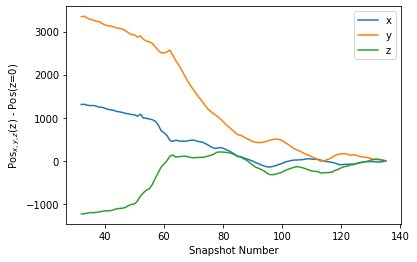

In [35]:
import matplotlib.pyplot as plt

with h5py.File(mpb2,'r') as f:
    pos = f['SubhaloPos'][:]
    snapnum = f['SnapNum'][:]
    subid = f['SubhaloNumber'][:]

for i in range(3):
    plt.plot(snapnum,pos[:,i] - pos[0,i], label=['x','y','z'][i])
plt.legend()
plt.xlabel('Snapshot Number')
plt.ylabel('Pos$_{x,y,z}$(z) - Pos(z=0)');

## Get a cutout of snapshot data

goal is an image of gas density around z=1 progenitor of subhalo

In [36]:
## First, what snapshot are we looking for?
url = sim['snapshots'] + "z=1/"
url

'http://www.tng-project.org/api/Illustris-3/snapshots/z=1/'

In [37]:
snap = get(url)
snap['number'], snap['redshift'] 

(85, 0.9972942257819399)

### Find the target Subfind ID at snapshot 85 using the Sublink tree

In [38]:
import numpy as np

i = np.where(snapnum == 85)
subid[i]

array([185], dtype=int32)

### Request subhalo details and a snapshot cutout of only gas fields

In [39]:
sub_prog_url = "http://www.tng-project.org/api/Illustris-3/snapshots/85/subhalos/185/"
sub_prog = get(sub_prog_url)
sub_prog['pos_x'], sub_prog['pos_y']

(11013.3, 51469.6)

In [40]:
cutout_request = {'gas':'Coordinates,Masses'}
cutout = get(sub_prog_url+"cutout.hdf5", cutout_request)

### Make a 2d histogram of the distrubution of gas bound to subhalo weighted by thelog of gas cell mass w/ position relative to subhalo center

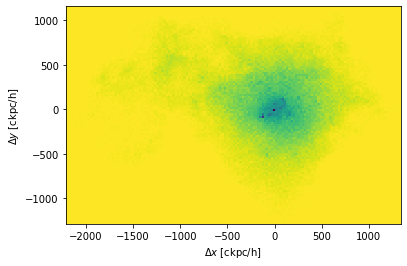

In [41]:
with h5py.File(cutout,'r') as f:
    x = f['PartType0']['Coordinates'][:,0] - sub_prog['pos_x']
    y = f['PartType0']['Coordinates'][:,1] - sub_prog['pos_y']
    dens = np.log10(f['PartType0']['Masses'][:])

plt.hist2d(x,y,weights=dens,bins=[150,100])
plt.xlabel('$\Delta x$ [ckpc/h]')
plt.ylabel('$\Delta y$ [ckpc/h]');

# Ex 1

for Illustris-1 at z=0, get all the fields available for the subhalo with id=0 and print its total mass and stellar half mass radius.

In [42]:
url = "http://www.tng-project.org/api/Illustris-1/snapshots/135/subhalos/0/"
r = get(url)
print(r['mass'])
print(r['halfmassrad_stars'])

22174.8
72.0388


# Ex 2

for Illustris-1 at z=2, search for all subhalos with total mass $10^{11.9}M⊙<M<10^{12.1}M⊙$, print the number returned, and the Subfind IDs of the first five results (arbitrarily ordered, you may get different ids).

In [43]:
## convert log solar masses into group catalog units
mass_min = 10**(11.9) / 1e10 * 0.704 ## minimum mass 10^(11.9) solar masses
mass_max = 10**(12.1) / 1e10 * 0.704 ## maximum mass 

In [44]:
# form the search_query string by hand for once
search_query = "?mass__gt=" + str(mass_min) + "&mass__lt=" + str(mass_max)
search_query

'?mass__gt=55.920707724589455&mass__lt=88.6283489903093'

In [45]:
## form the url and make the request
url = "http://www.tng-project.org/api/Illustris-1/snapshots/z=2/subhalos/" + search_query
subhalos = get(url)
subhalos['count']

550

In [46]:
ids = [ subhalos['results'][i]['id'] for i in range(5) ] ## first five results
ids

[1, 1352, 5525, 6574, 12718]

# Ex 3

for Illustris-1 at z=2, retrieve all fields for five specific Subfind IDs (from above: 109974, 110822, 123175, 107743, 95711), print the stellar mass and number of star particles in each.

In [47]:
ids = [1, 1352, 5525, 6574, 12718]

In [48]:
for id in ids:
    url = "http://www.tng-project.org/api/Illustris-1/snapshots/z=2/subhalos/" + str(id)
    subhalo = get(url)
    print(id, subhalo['mass_stars'], subhalo['len_stars'])

1 3.44785 54286
1352 3.14618 47648
5525 2.93244 45252
6574 3.73319 58277
12718 3.77762 57532


# Ex 4

for Illustris-1 at z=2, for five specific Subfind IDs (from above: 109974, 110822, 123175, 107743, 95711), extract and save full cutouts from the snapshot (HDF5 format).

In [49]:
import h5py 

def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r

In [50]:
ids = [1, 1352, 5525, 6574, 12718]

In [51]:
for id in ids:
    url = "http://www.tng-project.org/api/Illustris-1/snapshots/z=2/subhalos/" + str(id) + "/cutout.hdf5"
    saved_filename = get(url)
    print(id, saved_filename)

1 cutout_1.hdf5
1352 cutout_1352.hdf5
5525 cutout_5525.hdf5
6574 cutout_6574.hdf5
12718 cutout_12718.hdf5


# Ex 5

for Illustris-1 at z=2, for five specific Subfind IDs (from above: 109974, 110822, 123175, 107743, 95711), extract and save only star particles from the parent FoF halo of each subhalo.

In [52]:
params = {'stars':'all'}

for id in ids:
    url = "http://www.tng-project.org/api/Illustris-1/snapshots/z=2/subhalos/" + str(id)
    sub = get(url)
    saved_filename = get(sub['cutouts']['parent_halo'],params)
    print(sub['id'], sub['grnr'], saved_filename)

1 0 cutout_0.hdf5
1352 1 cutout_1.hdf5
5525 5 cutout_5.hdf5
6574 6 cutout_6.hdf5


KeyboardInterrupt: 

# Ex 6

for Illustris-1 at z=2 for Subfind ID 109974, get a cutout including only the positions and metallicities of stars, and calculate the mean stellar metallicity in solar units within the annuli 3kpc<r<5kpc (proper) centered on the fiducial subhalo position.

In [53]:
import h5py
import numpy as np

id = 109974

redshift = 2.0
params = {'stars':'Coordinates,GFM_Metallicity'}

scale_factor = 1.0 / (1+redshift)
little_h = 0.704
solar_Z = 0.0127

url = "http://www.tng-project.org/api/Illustris-1/snapshots/z=" + str(redshift) + "/subhalos/" + str(id)
sub = get(url) # get json response of subhalo properties
saved_filename = get(url + "/cutout.hdf5",params) # get and save HDF5 cutout file

In [54]:
# NOTE! If the subhalo is near the edge of the box, you must take the periodic boundary
# into account! (we ignore it here)

with h5py.File(saved_filename) as f:
    dx = f['PartType4']['Coordinates'][:,0] - sub['pos_x']
    dy = f['PartType4']['Coordinates'][:,1] - sub['pos_y']
    dz = f['PartType4']['Coordinates'][:,2] - sub['pos_z']
    metals = f['PartType4']['GFM_Metallicity'][:]

    rr = np.sqrt(dx**2 + dy**2 + dz**2)
    rr *= scale_factor/little_h # ckpc/h -> physical kpc

    w = np.where( (rr >= 3.0) & (rr < 5.0) )    
    print(np.mean( metals[w] ) / solar_Z)

0.24839260388077714


# Ex 7

for Illustris-1 at z=2, for five specific Subfind IDs (from above: 109974, 110822, 123175, 107743, 95711), locate the z=0 descendant of each by using the API to walk down the SubLink descendant links.

In [55]:
ids = [109974, 110822, 123175, 107743, 95711]
z0_descendant_ids = [-1]*len(ids)

for i,id in enumerate(ids):
    start_url = "http://www.tng-project.org/api/Illustris-1/snapshots/68/subhalos/" + str(id)
    sub = get(start_url)
    
    ## request full subhalo details of descendant by following sublink URL
    while sub['desc_sfid'] != -1:
        sub = get(sub['related']['sublink_descendant']) 
        if sub['snap'] == 135:
            z0_descendant_ids[i] = sub['id']
    
    if z0_descendant_ids[i] >= 0:
        print('Descendant of ' + str(id) + ' at z=0 is ' + str(z0_descendant_ids[i]))
    else:
        print('Descendant of ' + str(id) + ' not followed to z=0!')

Descendant of 109974 at z=0 is 41092
Descendant of 110822 at z=0 is 338375
Descendant of 123175 at z=0 is 257378
Descendant of 107743 at z=0 is 110568
Descendant of 95711 at z=0 is 260067


# Ex 8

for Illustris-1 at z=2 track Subfind ID 109974 to z=0, using the API to walk down the SubLink descendant links, and plot the mass evolution of each component (gas, dark matter, stars, and black holes).

/scratch/local/12799909/ipykernel_13864/2236232332.py:21: RuntimeWarning: divide by zero encountered in log10
  mass_logmsun = np.log10(np.array(r['mass_'+partType])*1e10/0.704)


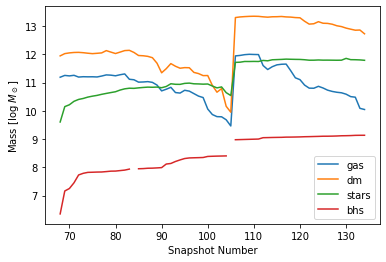

In [93]:
id = 109974
url = "http://www.tng-project.org/api/Illustris-1/snapshots/68/subhalos/" + str(id)
sub = get(url) # get json response of subhalo properties

## prepare dict to hole result arrays
fields = ['snap', 'id', 'mass_gas', 'mass_stars', 'mass_dm', 'mass_bhs']
r = {}

for field in fields:
    r[field] = []
    
while sub['desc_sfid'] != -1:
    for field in fields:
        r[field].append(sub[field])
    
    ## request full subhalo details of descendant
    sub = get(sub['related']['sublink_descendant'])

## make a plot, subhalo falls into a more massive halo around snapshot 105
for partType in ['gas','dm','stars','bhs']:
    mass_logmsun = np.log10(np.array(r['mass_'+partType])*1e10/0.704)
    plt.plot(r['snap'],mass_logmsun,label=partType)

plt.xlabel('Snapshot Number')
plt.ylabel('Mass [log $M_\odot$]')
plt.legend(loc = 'lower right')

# Ex 9

for Illustris-1 at z=0, check if pre-rendered mock stellar images exist for five specific Subfind IDs (the descendants from above: 41092, 338375, 257378, 110568, 260067). If so, download and display the PNGs.

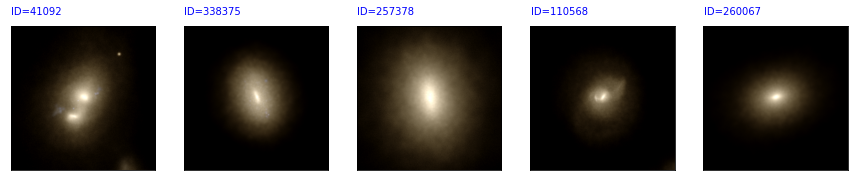

In [94]:
import matplotlib.image as mpimg
from io import BytesIO

ids = [41092,338375,257378,110568,260067]

sub_count = 1
plt.figure(figsize = [15,3])

for id in ids:
    url = "http://www.tng-project.org/api/Illustris-1/snapshots/135/subhalos/" + str(id)
    sub = get(url)
    
    ## possible data doesn't exist for all subhalos so
    if 'stellar_mocks' in sub['supplementary_data']:
        ## download PNG image version w/ all stars in FoF halo
        png_url = sub['supplementary_data']['stellar_mocks']['image_fof']
        response = get(png_url)
        
        plt.subplot(1,len(ids),sub_count)
        plt.text(0,-20,"ID="+str(id),color='blue')
        plt.gca().axes.get_xaxis().set_ticks([])
        plt.gca().axes.get_yaxis().set_ticks([])
        sub_count += 1
                                                            
        file_object = BytesIO(response.content)
        plt.imshow(mpimg.imread(file_object))                                    

# Ex 10

download the entire Illustris-1 z=0 snapshot including only the positions, masses, and metallicities of stars (in the form of 512 HDF5 files).

'/home/odonnells/ast490'

NameError: name 'get' is not defined